In [69]:
from os.path import join
import pandas as pd
import pandas as pd
import seaborn as sb
import sys
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)


sys.path.append("..")
print(sys.path)
import src.constants as const


sb.set()

df = pd.read_pickle(join(const.ARTIFACTS_DIR, "preprocessed.pkl"))


print(len(df))
df.head()

# df.set_index("dc:identifier", inplace=True)
# df["prism:coverDate_D"] = df["prism:coverDate"].round("D")

['/home/ki/projects/scopus/scopus-mining/notebooks', '/home/ki/projects/scopus/scopus-mining', '/home/ki/anaconda3/envs/scopus/lib/python38.zip', '/home/ki/anaconda3/envs/scopus/lib/python3.8', '/home/ki/anaconda3/envs/scopus/lib/python3.8/lib-dynload', '', '/home/ki/.local/lib/python3.8/site-packages', '/home/ki/anaconda3/envs/scopus/lib/python3.8/site-packages', '/home/ki/anaconda3/envs/scopus/lib/python3.8/site-packages/IPython/extensions', '/home/ki/.ipython', '/home/ki/pycharm-ee/plugins/python/helpers/pydev', '/home/ki/pycharm-ee/plugins/python/helpers-pro/jupyter_debug', '..', '..', '..', '..', '..']
32387


,@_fa,affiliation,article-number,authkeywords,author,author-count,citedby-count,dc:creator,dc:description,dc:title,...,author:name:given,author:name:sur,affiliation:id,affiliation:name,affiliation:city,affiliation:country,authkeywords:preprocessed,dc:description:tokenized,dc:description:keywords,dc:description:tokenized:gensim
dc:identifier,,,,,,,,,,,,,,,,,,,,,
SCOPUS_ID:85088667159,true,"[{'@_fa': 'true', 'affiliation-url': 'https://...",NaN,case study | critical Whiteness pedagogy | rac...,"[{'@_fa': 'true', '@seq': '1', 'author-url': '...","{'@limit': '100', '@total': '1', '$': '1'}",0,Olcon K.,© 2020 Taylor & Francis. Inadequate attentio...,Confronting Whiteness: White U.S. Social Work ...,...,[Katarzyna],[Olcon],[60011664],[University of Wollongong],[Wollongong],[Australia],"[case study, critical Whiteness pedagogy, raci...",taylor francis inadequate attention race racis...,"[white, students, racism, african, experiences...","[inadequate, attention, race, racism, whitenes..."
SCOPUS_ID:85088663800,true,"[{'@_fa': 'true', 'affiliation-url': 'https://...",NaN,consciousness raising | Critical consciousness...,"[{'@_fa': 'true', '@seq': '1', 'author-url': '...","{'@limit': '100', '@total': '1', '$': '1'}",0,Knipe M.R.,© 2020 Taylor & Francis. Developing critical...,Promoting Critical Consciousness in Undergradu...,...,[Mallory R.],[Knipe],[60076959],[Saint Mary's University of Minnesota],[Winona],[United States],"[consciousness raising, Critical consciousness...",taylor francis developing critical consciousne...,"[consciousness, critical, process, students, p...","[taylor, francis, critical, consciousness, key..."
SCOPUS_ID:85088659009,true,"[{'@_fa': 'true', 'affiliation-url': 'https://...",NaN,Community-centered education | learning space ...,"[{'@_fa': 'true', '@seq': '1', 'author-url': '...","{'@limit': '100', '@total': '2', '$': '2'}",0,Moore M.,© 2020 Taylor & Francis. Students from six c...,Using Interactive Learning Spaces for Global D...,...,"[Matt, Ana]","[Moore, Mann]",[60028244],[Ball State University],[Muncie],[United States],"[Community-centered education, learning space ...",taylor francis students countries collaborated...,"[students, collaboration, international, justi...","[taylor, francis, student, country, project, s..."
SCOPUS_ID:85088653581,true,"[{'@_fa': 'true', 'affiliation-url': 'https://...",NaN,Neuroscience | Neurosequential Model of Therap...,"[{'@_fa': 'true', '@seq': '1', 'author-url': '...","{'@limit': '100', '@total': '3', '$': '3'}",0,Mason C.,© 2020 Taylor & Francis. To fill a gap in re...,Including Neuroscience in Social Work Educatio...,...,"[Christie, Brian L., Virginia]","[Mason, Kelly, McConchie]",[60003545],[Loyola University of Chicago],[Chicago],[United States],"[Neuroscience, Neurosequential Model of Therap...",taylor francis fill gap research incorporation...,"[neuroscience, model, alumni, work, trauma, ms...","[taylor, francis, fill, gap, research, incorpo..."
SCOPUS_ID:85088640742,true,"[{'@_fa': 'true', 'affiliation-url': 'https://...",NaN,5-way learning | Doctoral program affirmation ...,"[{'@_fa': 'true', '@seq': '1', 'author-url': '...","{'@limit': '100', '@total': '5', '$': '5'}",1,Chen X.,© 2020 Taylor & Francis. Eleven doctoral int...,Reflections on Social Work Doctoral Pedagogy: ...,...,"[Xin, Monit, Shu, Patrick, Maurya]","[Chen, Cheung, Zhou, Leung, Glaude]","[60017672, 60005837]","[Tulane University, University of Houston]","[New Orleans, Houston]","[United States, United States]","[5-way learning, Doctoral program affirmation,...",taylor francis doctoral interns faculty mentor...,"[teaching, interns, mentor, mentors, mentorshi...","[taylor, francis, doctoral, intern, faculty, m..."


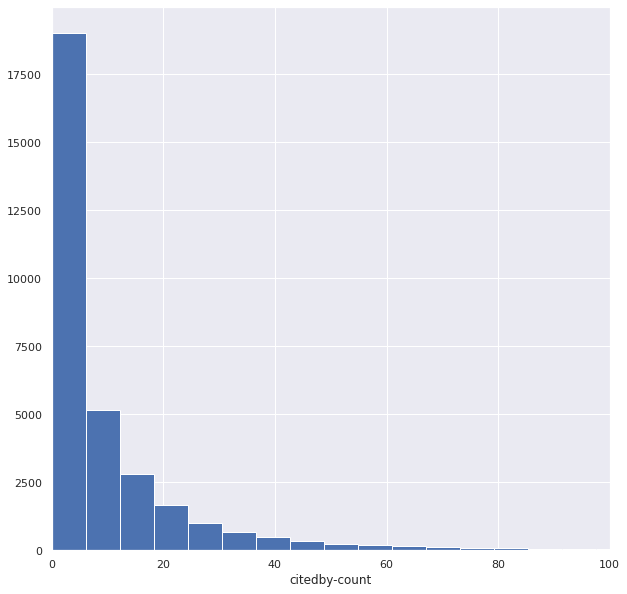

In [70]:
plt.hist(df["citedby-count"], bins=100)
plt.xlim(0, 100)
plt.xlabel("citedby-count")
plt.savefig(join(const.ARTIFACTS_DIR, "hist.png"), dpi=300)
plt.show()
#sb.displot(df["citedby-count"], hist=True, norm_hist=False, bins=5)
#plt.xlim(0, 100)

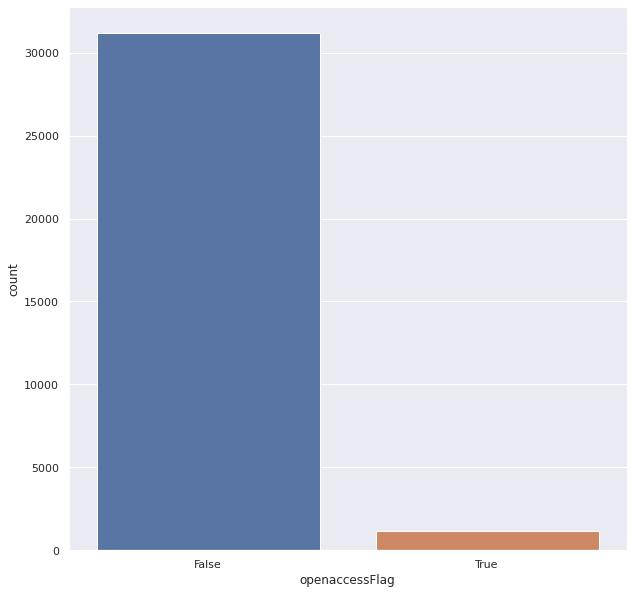

In [71]:
sb.countplot(data=df, x="openaccessFlag")
plt.savefig(join(const.ARTIFACTS_DIR, "openaccess.png"), dpi=300)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

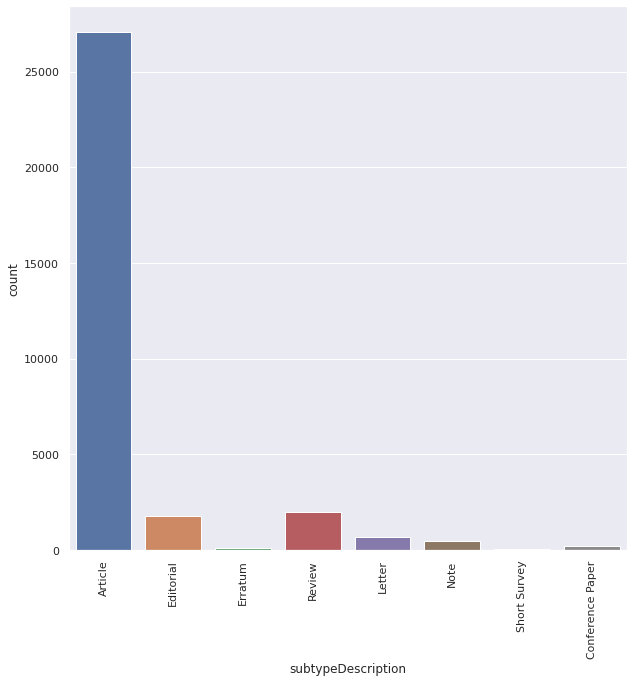

In [72]:
sb.countplot(data=df, x="subtypeDescription")
plt.savefig(join(const.ARTIFACTS_DIR, "subtypeDescription.png"), dpi=300)
plt.xticks(rotation=90)

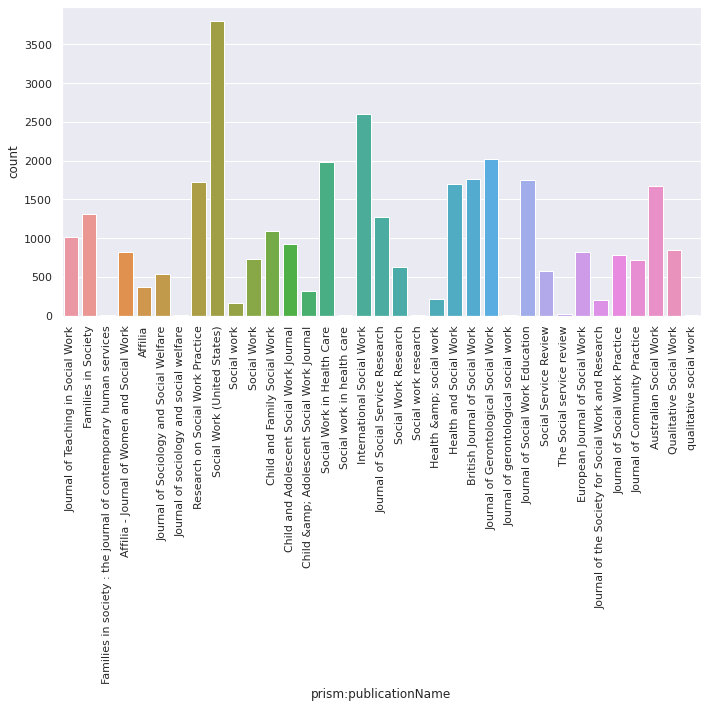

In [73]:
fig = plt.figure(figsize=(10,10))
sb.countplot(data=df, x="prism:publicationName", orient="v")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(join(const.ARTIFACTS_DIR, "publicationName.png"), dpi=300)

In [74]:
abstracts = df["dc:description"].str
corpus = abstracts.lower()
corpus = corpus[~corpus.isnull()]

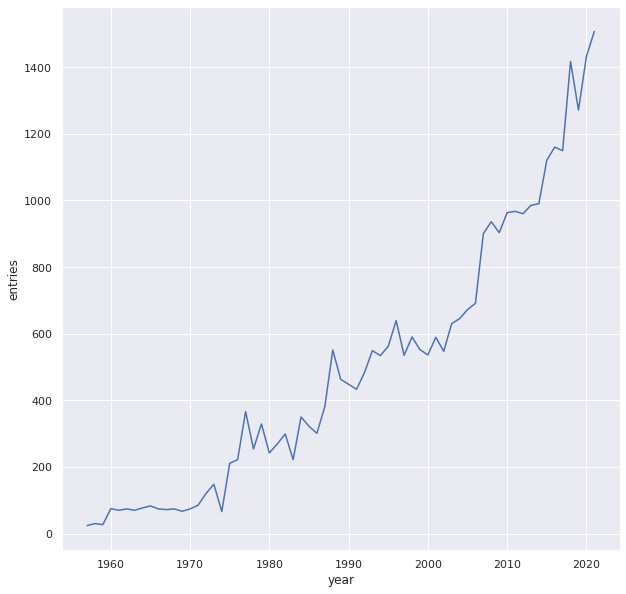

In [75]:

g = df.reset_index().set_index("prism:coverDate").groupby(pd.Grouper(freq="Y", dropna=True, sort=True)).count()
sb.lineplot(data=g.reset_index(), x="prism:coverDate", y="dc:identifier")
plt.ylabel("entries")
plt.xlabel("year")
plt.savefig(join(const.ARTIFACTS_DIR, "years.png"), dpi=300)


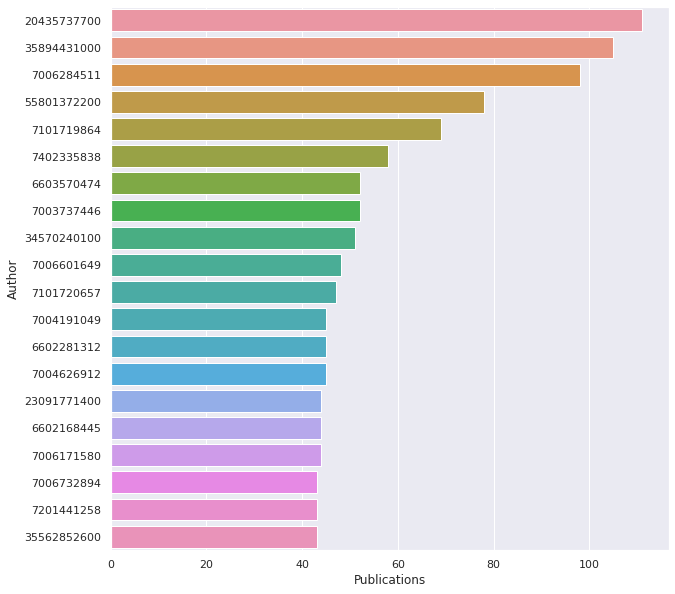

In [104]:
author_counts = df["author:id"].explode().value_counts()
author_counts = author_counts.reset_index().rename(columns = {'index': "Author", "author:id": "Publications"})

author_counts["Author"].apply(lambda x: df)
sb.barplot(data=author_counts.reset_index()[:20], x="Publications", y="Author", orient="h")
#plt.xlabel("Count")
# plt.ylabel("Author")

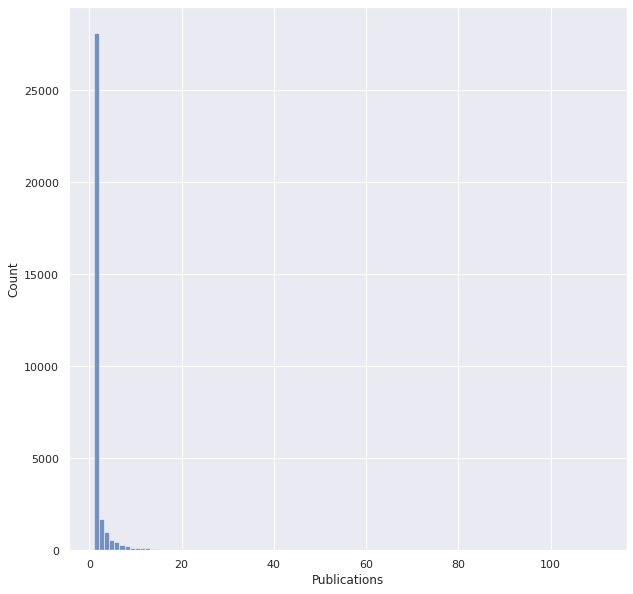

In [105]:
sb.histplot(data=author_counts.reset_index(), x="Publications", bins=100)


In [128]:
affil_counts = df["affiliation:country"].explode().value_counts()
affil_counts = affil_counts.reset_index().rename(columns = {'index': "Country", "affiliation:country": "Publications"})

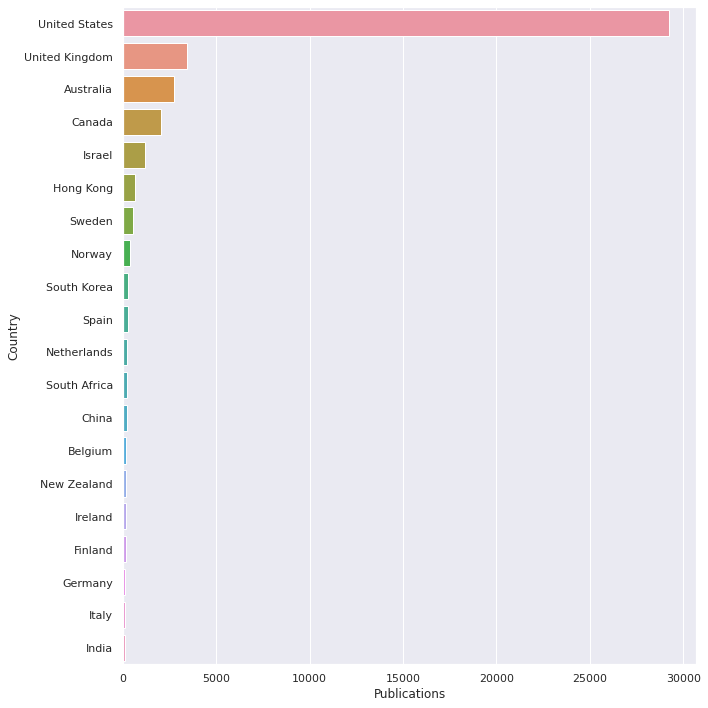

In [129]:
sb.barplot(data=affil_counts.reset_index()[:20], x="Publications", y="Country", orient="h")
plt.tight_layout()
plt.savefig(join(const.ARTIFACTS_DIR, "country.jpg"), dpi=300)

In [130]:
affil_counts = df["affiliation:name"].explode().value_counts()
affil_counts = affil_counts.reset_index().rename(columns = {'index': "Name", "affiliation:name": "Publications"})

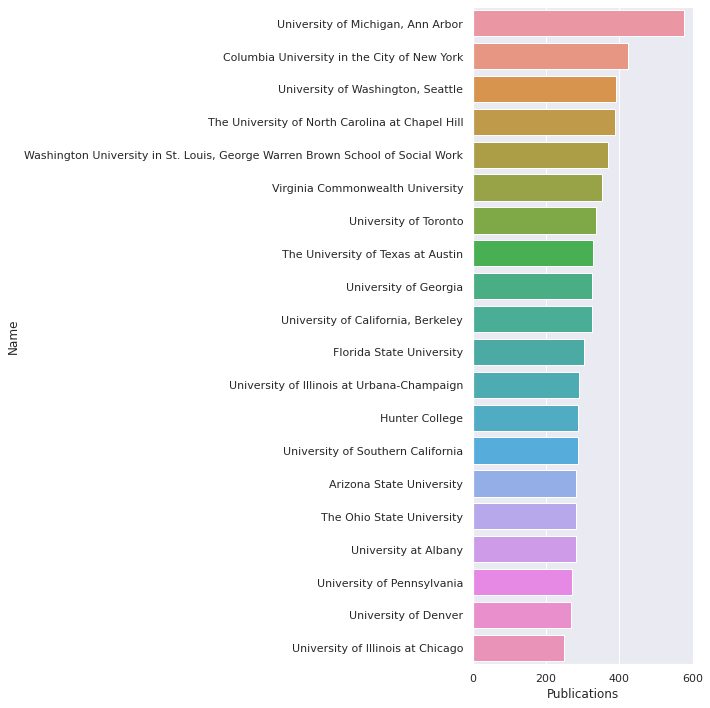

In [131]:
sb.barplot(data=affil_counts.reset_index()[:20], x="Publications", y="Name", orient="h")
plt.tight_layout()
plt.savefig(join(const.ARTIFACTS_DIR, "affiliations.jpg"), dpi=300)


In [76]:
# total_df = pd.DataFrame()
#
# for file in files:
#
#     if file.endswith(".pkl"):
#         indx = total_df.index.unique()
#         print("Indexes:", len(indx))
#
#         try:
#             print(file)
#             df = pickle.load(open(file, "rb"))
#             douplicate = df["prism:doi"].isin(indx)
#             print("douplicates: ", douplicate.sum())
#
#             df = df[~douplicate].set_index("prism:doi")
#
#             total_df = total_df.append(df, ignore_index=False, verify_integrity=True, sort=True)
#
#             # print("length ", len(df))
#             # # print("douplicates ", len(df[df.index.duplicated()]))
#             #
#             # if total_df is None:
#             #     total_df = df.copy()
#             # else:
#             #     mdf = pd.concat([total_df, df])
#             #     if not mdf.index.is_unique:
#             #         print("douplicates", len(mdf[mdf.index.duplicated()]))
#             #     else:
#             #         total_df = mdf
#             #         print("Added. Len: ", len(total_df))
#         except Exception as e:
#             print(e)
#

In [117]:
import src.utils as utils
from collections import OrderedDict

def get_cooccurences(documents, keywords):
    # a dic of dicts, one dic per keyword, containing co-occurences with other dicts
    occurrences = OrderedDict((str(key), OrderedDict((str(key), 0) for key in keywords)) for key in keywords)
    # Find the co-occurrences:
    for document in documents:
        for i in range(len(document)):
            for word in document[:i] + document[i + 1:]:
                if str(document[i]) in keywords and word in keywords:
                    occurrences[str(document[i])][word] += 1
    return occurrences

In [121]:
import csv

utils.configure_logging()

print("Loading dataframe")
df = pd.read_pickle(join(const.ARTIFACTS_DIR, "preprocessed.pkl"))

doc_keywords = df["dc:description:keywords"][:1000]
all_keywords = doc_keywords.explode().unique()
print(f"Unique Keywords: {len(all_keywords)}")

# create cooc matrix and save to disk
print("Calculating keyword co-occurences")
occurrences = get_cooccurences(doc_keywords, all_keywords)
co_occur = pd.DataFrame.from_records(occurrences)
co_occur.to_csv(join(const.ARTIFACTS_DIR, "cooc_abstracts.csv"), sep=";", quoting=csv.QUOTE_ALL)
co_occur.to_pickle(join(const.ARTIFACTS_DIR, "cooc_asbtracts.pkl"))

print("Done.")

Loading dataframe
Unique Keywords: 3583
Calculating keyword co-occurences
Done.
